In [32]:
# Import packages and set style
import librosa
from librosa.feature import tempogram
from librosa.beat import tempo
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
import numpy as np
style.use('seaborn')
rcParams['figure.figsize'] = (16, 8)


In [23]:
def make_tempogram(filepaths):
    """Accept a list of filepaths, and make a tempogram for each wavfile in the list."""
    
    # Get and return a list of tempograms for each audio file
    grams = []
    rates = []
    for filepath in filepaths:
        data, rate = librosa.load(filepath)
        gram = tempogram(data, rate)
        grams.append(gram)
        rates.append(rate)
    return grams, rates
        

In [22]:
def get_tempos(filepaths):
    """Accept a list of filepaths, and get the tempos for each wavfile in the list."""
    
    # Get and return a list of tempos for each audio file
    tempos = []
    for filepath in filepaths:
        data, rate = librosa.load(filepath)
        temp = tempo(data, rate)
        tempos.append(temp)
    return tempos


Tempogram dimensions: (384, 1291)
Tempogram dimensions: (384, 1293)
Tempogram dimensions: (384, 1291)


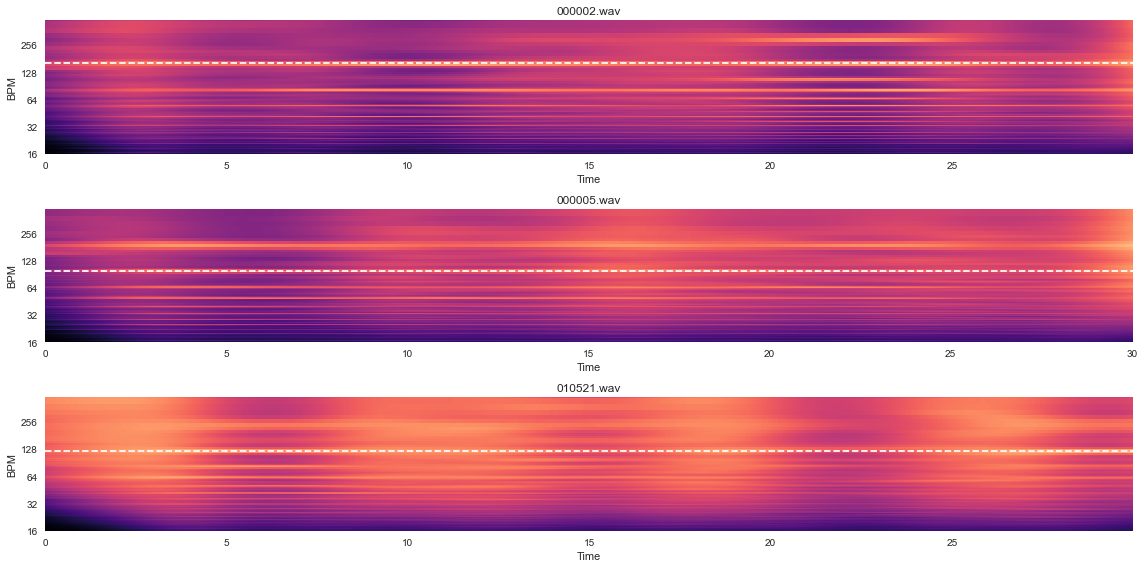

In [39]:
# Create a list of filepaths to test with and get the data from them
filepaths = ['./../data/wavs/000002.wav', './../data/wavs/000005.wav', './../data/wavs/010521.wav']
grams, rates = make_tempogram(filepaths)
tempos = get_tempos(filepaths)

# Plot the stuff
fig, axes = plt.subplots(3, 1)
for k in range(len(grams)):
    print('Tempogram dimensions:', grams[k].shape)
    display.specshow(grams[k], sr=rates[k], x_axis='time', y_axis='tempo', cmap='magma', ax=axes[k])
    axes[k].axhline(tempos[k], color='w', linestyle='--', alpha=1)
    axes[k].set_title(str(filepaths[k][15:]))
plt.tight_layout()
plt.show()
    